In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

rup = np.zeros([8,8], dtype=np.uint8)
print(rup)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]


In [84]:
rup[2:-2, 2:-2] = 190
print(rup)

[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0 190 190 190 190   0   0]
 [  0   0 190 190 190 190   0   0]
 [  0   0 190 190 190 190   0   0]
 [  0   0 190 190 190 190   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


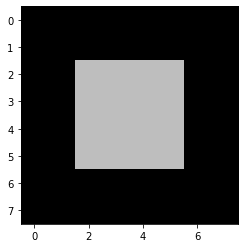

In [85]:
plt.imshow(cv2.cvtColor(rup, cv2.COLOR_GRAY2RGB), cmap='gray')
plt.show()

In [86]:
contour , hier = cv2.findContours(
    rup, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(contour)

[array([[[2, 2]],

       [[2, 5]],

       [[5, 5]],

       [[5, 2]]], dtype=int32)]


[2 2]
[2 5]


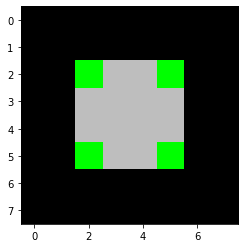

In [87]:
 rup = cv2.cvtColor(rup, cv2.COLOR_GRAY2RGB)
for i in range(4):
    x,y = contour[0][i,0]
    rup[y,x] = (0,255,0)
#     print(x)
print(contour[0][0,0])
print(contour[0][1,0])

plt.imshow(rup)

362


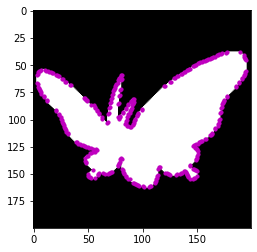

In [88]:
but = cv2.imread('buttlefly.png',0)
contour,_ = cv2.findContours(but, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contour[0]))

plt.imshow(cv2.cvtColor(but, cv2.COLOR_GRAY2RGB))
x = contour[0][:,0,0]
y = contour[0][:,0,1]
plt.scatter(x,y,s=10,c='m')
plt.show()

9


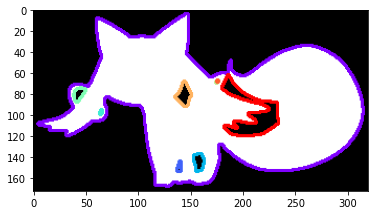

In [89]:
fox = cv2.imread('fox.png',0)
contour, _ = cv2.findContours(fox, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
n_cont_line = len(contour)
print(n_cont_line)

fox = cv2.cvtColor(fox, cv2.COLOR_GRAY2BGR)
for i in range(n_cont_line):
    r,g,b,a = plt.get_cmap('rainbow')(i/(n_cont_line-1))
    color = (b*255,g*255,r*255)
    rup = cv2.drawContours(fox,contour,i,color,2)
plt.imshow(rup[:,:,::-1])

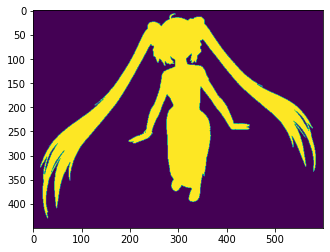

In [90]:
mk = cv2.imread('miku.jpg')
mk_gr = cv2.cvtColor(mk, cv2.COLOR_BGR2GRAY)
_ , mk_th = cv2.threshold(mk_gr, 10, 255,0)
plt.imshow(mk_th)


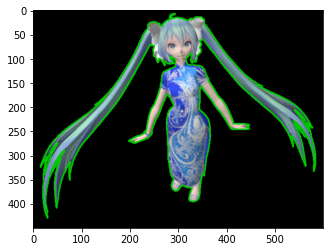

In [91]:
contour,_ = cv2.findContours(mk_th,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contour)):
    mk = cv2.drawContours(mk, contour, i, (0,200,0), 2)
plt.imshow(mk[:,:,::-1])

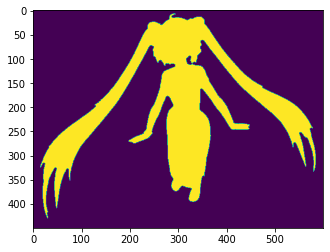

In [92]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
mk_th = cv2.morphologyEx(mk_th, cv2.MORPH_CLOSE, kernel)
plt.imshow(mk_th)

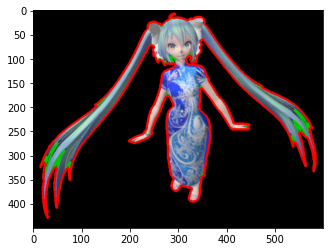

In [93]:
contour,_ = cv2.findContours(mk_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contour)):
    mk = cv2.drawContours(mk, contour, i , (0,0,255), 4)
# mk = cv2.resize(mk,(2000,2000))
plt.imshow(mk[:,:,::-1])


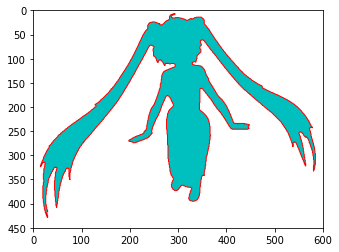

In [95]:
ax = plt.axes(aspect=1, xlim=[0,600], ylim=[450,0])
for cnt in contour:
    ax.add_patch(plt.Polygon(cnt[:,0], fc='c', ec='r'))
plt.show()